In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")

In [39]:
phi = 1.5
T = 24
omega = 2*np.pi/T
t = np.arange(0,240) # t en horas
y1 = np.sin(omega*t)
y2 = np.cos(omega*(t-phi))

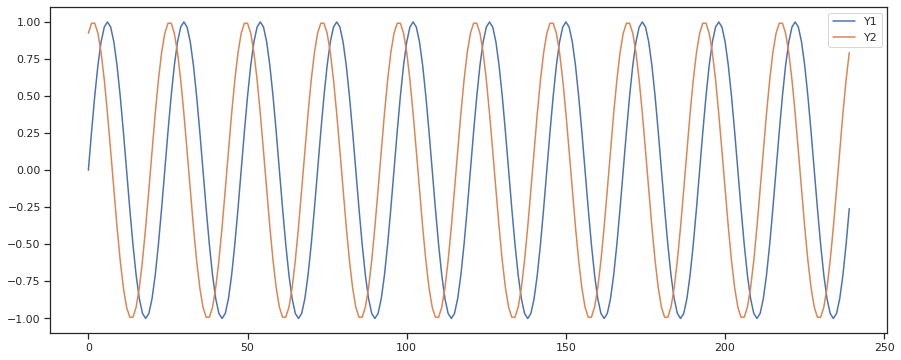

In [43]:
plt.figure(figsize=(15,6))
plt.plot(t,y1,label="Y1")
plt.plot(t,y2,label="Y2")
plt.legend()
plt.show()

/home/antonio/.conda/envs/llc/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/antonio/.conda/envs/llc/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/antonio/.conda/envs/llc/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/antonio/.conda/envs/llc/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to t

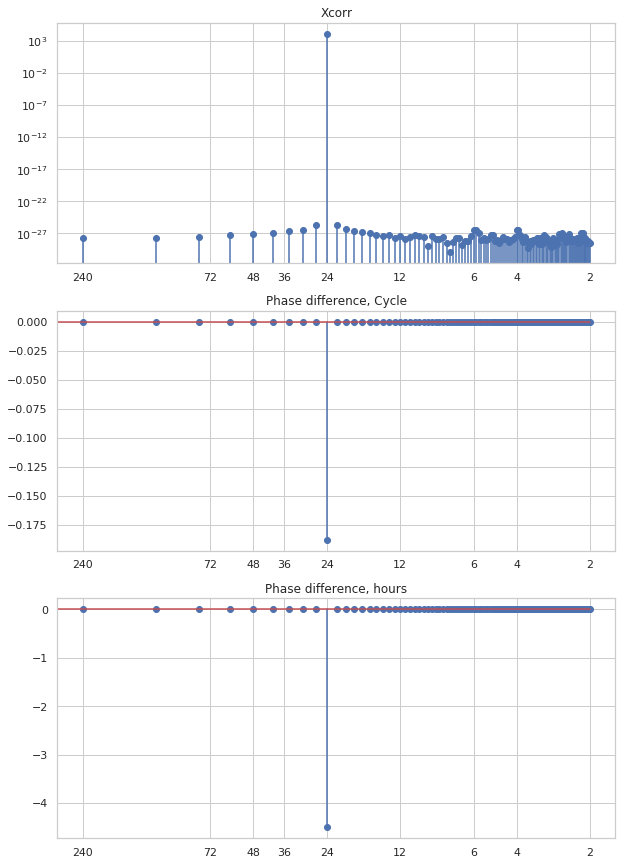

[48.         40.         34.28571429 30.         26.66666667 24.
 21.81818182 20.         18.46153846 17.14285714]
[-0.  -0.  -0.  -0.  -0.  -4.5 -0.  -0.  -0.  -0. ]


In [41]:
zeta_fft = np.fft.rfft(y2)
delta_fft = np.fft.rfft(y1)
xcorr_fft = np.abs(zeta_fft*delta_fft.conjugate())
xcorr_threshold = (xcorr_fft>0.05).astype(np.float32)
xcorr_threshold[0] = 0
fft_freq = np.fft.rfftfreq(240,1) # Freq en ciclos por hora
phasediff_rad = -1*np.angle(zeta_fft/delta_fft)
phasediff_hr = phasediff_rad/(2*np.pi*fft_freq)
phasediff_hr_thr = xcorr_threshold*phasediff_hr
f_ticklabels = [2,4,6,12,24,36,48,72,24*10]
#f_ticklabels = [6,12,24,36,48,72,24*4,24*7]
f_ticks = [1/tk for tk in f_ticklabels]

with sns.axes_style("whitegrid"):
	fig, ax = plt.subplots(3,1,figsize=(10,15))
	plt.sca(ax[0])
	plt.stem(fft_freq, xcorr_fft)
	#ax[0].set_xscale('log')
	ax[0].set_xscale('log')
	ax[0].set_yscale('log')
	plt.xticks(ticks=f_ticks, labels=f_ticklabels)
	plt.title("Xcorr")
	plt.sca(ax[1])
	plt.stem(fft_freq, xcorr_threshold*phasediff_rad/(2*np.pi))
	ax[1].set_xscale('log')
	plt.xticks(ticks=f_ticks, labels=f_ticklabels)
	plt.title("Phase difference, Cycle")
	plt.sca(ax[2])
	plt.stem(fft_freq, phasediff_hr_thr)
	ax[2].set_xscale('log')
	plt.xticks(ticks=f_ticks, labels=f_ticklabels)
	plt.title("Phase difference, hours")
	plt.show()

print(1/fft_freq[5:15])
print(phasediff_hr_thr[5:15])